In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('Waves_2023.txt', sep='\s+') 

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Thaomy\AppData\Local\Temp\ipykernel_10992\3125395425.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Waves_2023.txt', sep='\s+')


In [3]:
df

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2023,1,1,0,26,999,99.0,99.0,1.12,12.50,7.69,269,9999.0,999.0,15.3,999.0,99.0,99.0
1,2023,1,1,0,56,999,99.0,99.0,1.16,11.76,7.34,272,9999.0,999.0,15.3,999.0,99.0,99.0
2,2023,1,1,1,26,999,99.0,99.0,1.20,12.50,7.08,268,9999.0,999.0,15.3,999.0,99.0,99.0
3,2023,1,1,1,56,999,99.0,99.0,1.25,10.53,7.33,268,9999.0,999.0,15.4,999.0,99.0,99.0
4,2023,1,1,2,26,999,99.0,99.0,1.27,10.53,7.57,268,9999.0,999.0,15.5,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17280,2023,12,31,21,56,999,99.0,99.0,2.01,14.29,11.19,270,9999.0,999.0,16.7,999.0,99.0,99.0
17281,2023,12,31,22,26,999,99.0,99.0,1.75,15.38,10.37,267,9999.0,999.0,16.7,999.0,99.0,99.0
17282,2023,12,31,22,56,999,99.0,99.0,1.79,13.33,10.50,268,9999.0,999.0,16.8,999.0,99.0,99.0
17283,2023,12,31,23,26,999,99.0,99.0,1.66,14.29,10.32,271,9999.0,999.0,16.8,999.0,99.0,99.0


In [4]:
Xvar = df[['DPD','APD','MWD','WTMP']].to_numpy()
Xvar

array([[ 12.5 ,   7.69, 269.  ,  15.3 ],
       [ 11.76,   7.34, 272.  ,  15.3 ],
       [ 12.5 ,   7.08, 268.  ,  15.3 ],
       ...,
       [ 13.33,  10.5 , 268.  ,  16.8 ],
       [ 14.29,  10.32, 271.  ,  16.8 ],
       [ 12.5 ,  10.54, 271.  ,  16.9 ]])

In [5]:
yvar = np.array(df['WVHT'])
yvar

array([1.12, 1.16, 1.2 , ..., 1.79, 1.66, 1.7 ])

In [6]:
# I want 75% train, 10% test, 15% validate
X, X_test, y, y_test = train_test_split(Xvar, yvar, test_size=0.10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.167)

### Questions and Answers
1. The baseline model that I chose was a linear model, which produced mean squared error of 1.733 for training, 2.186 for validation, and 1.867 for testing data. The boosted regression tree model produced mean squared error of 0.067 for training, 0.090 for validation, and 0.086 for testing data. Hence, the boosted regression tree model performed better as it produced lower errors across all datasets.
2. The cost function of LinearRegression is Ordinary Least Squares (OLS). The cost function of XGBRegressor is mean_squared aka Mean Squared Error (MSE).
3. For Boosted Regression Tree, I chose a learning rate of 0.5 because it produced the lowest mean squared error when predicting validation data.
4. See plot below
5. I do not have evidence of overfitting. Eventhough the difference in training error and validation error does grow with number of iterations, we can only state that there's overfitting if the validation error increases with number of iterations. From the graph, we see that validation error remains the same (relatively) from 25 iterations onwards.
6. Based on the plot, number of iterations around 50 are optimal because the validation mse remains the same (0.086476) from 50 onwards, so any number of iterations above 50 would be unnecessary. When I used the function best_iteration, the result was 48, which matches what I saw on my graph.

### Baseline: Linear Model

In [9]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
y_train_pred = linear.predict(X_train)
y_val_pred = linear.predict(X_val)
y_test_pred = linear.predict(X_test)

print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_squared_error(y_test, y_test_pred))

1.7335945945541635
2.186237684839513
1.8667526476136913


### Boosted Regression Tree

In [21]:
parameter = np.arange(0, 1.1, 0.1)

for i in parameter:
    bst = XGBRegressor(n_estimators=25, learning_rate= i)
    bst.fit(X_train, y_train)
    y_val_pred = bst.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)

    print(f'Learning Rate: {i}, Validation MSE: {val_mse}')
    

Learning Rate: 0.0, Validation MSE: 7.660229513972118
Learning Rate: 0.1, Validation MSE: 0.19473254894759048
Learning Rate: 0.2, Validation MSE: 0.10266739053185443
Learning Rate: 0.30000000000000004, Validation MSE: 0.09382481383262892
Learning Rate: 0.4, Validation MSE: 0.09155727502618975
Learning Rate: 0.5, Validation MSE: 0.09010162693832006
Learning Rate: 0.6000000000000001, Validation MSE: 0.09374817706039935
Learning Rate: 0.7000000000000001, Validation MSE: 0.09636249793344935
Learning Rate: 0.8, Validation MSE: 0.09468358973350703
Learning Rate: 0.9, Validation MSE: 0.09535341122786094
Learning Rate: 1.0, Validation MSE: 0.10348638413227793


In [22]:
bst = XGBRegressor(n_estimators=25, learning_rate=0.5)
bst = bst.fit(X_train, y_train)
y_train_pred = bst.predict(X_train)
y_val_pred = bst.predict(X_val)
y_test_pred = bst.predict(X_test)

print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_squared_error(y_test, y_test_pred))

0.06697417630608776
0.09010162693832006
0.08569838780728695


### Boosted Regression Tree - Optimizing Boosting Interations

In [26]:
n_tree = [2,10,25,50,100,250,500,1000]
train_error = []
valid_error = []

for i in n_tree:
    bst = XGBRegressor(n_estimators= i)
    bst.fit(X_train, y_train)
    
    y_train_pred = bst.predict(X_train)
    y_val_pred = bst.predict(X_val)
    
    train_err = mean_squared_error(y_train, y_train_pred)
    valid_err = mean_squared_error(y_val, y_val_pred)
    
    train_error.append(train_err)
    valid_error.append(valid_err)
    print(f'Iteration: {i}, Train MSE: {train_err}, Valid MSE: {valid_err}')

Iteration: 2, Train MSE: 1.517338712676222, Valid MSE: 2.411525648035168
Iteration: 10, Train MSE: 0.11312154418052368, Valid MSE: 0.12632310415549078
Iteration: 25, Train MSE: 0.08273221307341727, Valid MSE: 0.09382481383262892
Iteration: 50, Train MSE: 0.06065180287597256, Valid MSE: 0.08768230582730466
Iteration: 100, Train MSE: 0.043434084674463316, Valid MSE: 0.0839865638179296
Iteration: 250, Train MSE: 0.02322971337268013, Valid MSE: 0.08295351842834997
Iteration: 500, Train MSE: 0.010806318126726543, Valid MSE: 0.08545688153550295
Iteration: 1000, Train MSE: 0.003579457584547218, Valid MSE: 0.09062238466537567


In [27]:
data = {'iterations':n_tree,
        'train error':train_error,
        'validation error':valid_error}

In [28]:
boost_df = pd.DataFrame(data)
boost_df

,iterations,train error,validation error
0,2,1.517339,2.411526
1,10,0.113122,0.126323
2,25,0.082732,0.093825
3,50,0.060652,0.087682
4,100,0.043434,0.083987
5,250,0.023230,0.082954
6,500,0.010806,0.085457
7,1000,0.003579,0.090622


Text(0, 0.5, 'Mean Squared Error')

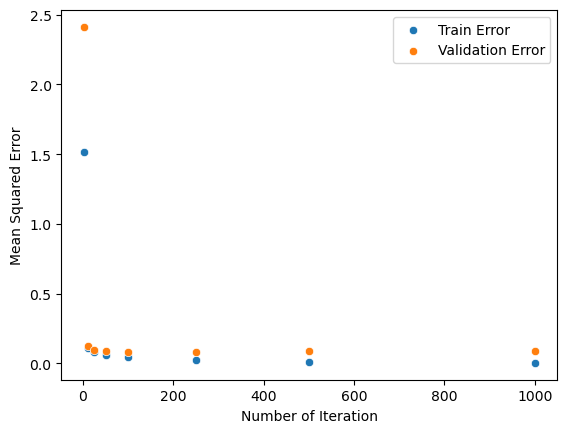

In [30]:
sns.scatterplot(data=boost_df, x='iterations', y='train error', label='Train Error')
sns.scatterplot(data=boost_df, x='iterations', y='validation error', label='Validation Error')

plt.xlabel('Number of Iteration')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Squared Error')

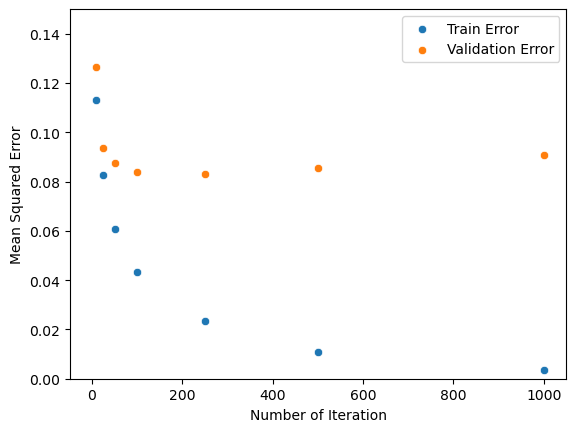

In [32]:
plt.ylim(0, 0.15)

sns.scatterplot(data=boost_df, x='iterations', y='train error', label='Train Error')
sns.scatterplot(data=boost_df, x='iterations', y='validation error', label='Validation Error')

plt.xlabel('Number of Iteration')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Squared Error')

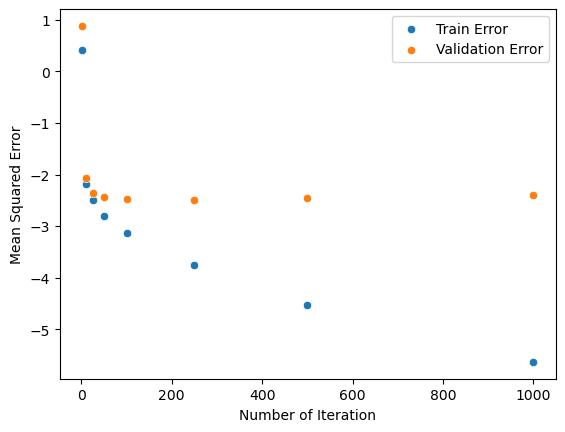

In [33]:
sns.scatterplot(x=boost_df['iterations'], y=np.log(boost_df['train error']), label='Train Error')
sns.scatterplot(x=boost_df['iterations'], y=np.log(boost_df['validation error']), label='Validation Error')

plt.xlabel('Number of Iteration')
plt.ylabel('Mean Squared Error')

### Boosted Regression Tree: Early Stopping

In [36]:
n_tree = [2,10,25,50,100,250,500,1000]
train_error = []
valid_error = []

for i in n_tree:
    bst = XGBRegressor(n_estimators=i, learning_rate=0.5, early_stopping_rounds=10)
    bst = bst.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    
    y_train_pred = bst.predict(X_train)
    y_val_pred = bst.predict(X_val)
    
    train_err = mean_squared_error(y_train, y_train_pred)
    valid_err = mean_squared_error(y_val, y_val_pred)
    
    train_error.append(train_err)
    valid_error.append(valid_err)
    
    print(f'Iteration: {i}, Train MSE: {train_err}, Valid MSE: {valid_err}')

[0]	validation_0-rmse:1.60599
[1]	validation_0-rmse:0.95952
Iteration: 2, Train MSE: 0.606089028397954, Valid MSE: 0.9206745437411223
[0]	validation_0-rmse:1.60599
[1]	validation_0-rmse:0.95952
[2]	validation_0-rmse:0.61625
[3]	validation_0-rmse:0.44367
[4]	validation_0-rmse:0.36998
[5]	validation_0-rmse:0.34062
[6]	validation_0-rmse:0.32829
[7]	validation_0-rmse:0.32267
[8]	validation_0-rmse:0.32144
[9]	validation_0-rmse:0.32137
Iteration: 10, Train MSE: 0.09254236488464528, Valid MSE: 0.10327976045730738
[0]	validation_0-rmse:1.60599
[1]	validation_0-rmse:0.95952
[2]	validation_0-rmse:0.61625
[3]	validation_0-rmse:0.44367
[4]	validation_0-rmse:0.36998
[5]	validation_0-rmse:0.34062
[6]	validation_0-rmse:0.32829
[7]	validation_0-rmse:0.32267
[8]	validation_0-rmse:0.32144
[9]	validation_0-rmse:0.32137
[10]	validation_0-rmse:0.32037
[11]	validation_0-rmse:0.31544
[12]	validation_0-rmse:0.31289
[13]	validation_0-rmse:0.31010
[14]	validation_0-rmse:0.30880
[15]	validation_0-rmse:0.30667
[1

In [37]:
data = {'iterations':n_tree,
        'train error':train_error,
        'validation error':valid_error}

stop_df = pd.DataFrame(data)
stop_df

,iterations,train error,validation error
0,2,0.606089,0.920675
1,10,0.092542,0.103280
2,25,0.066974,0.090102
3,50,0.050859,0.086476
4,100,0.050859,0.086476
5,250,0.050859,0.086476
6,500,0.050859,0.086476
7,1000,0.050859,0.086476


Text(0, 0.5, 'Mean Squared Error')

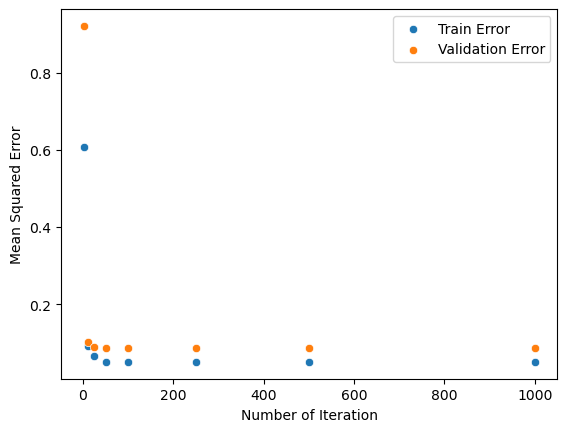

In [39]:
sns.scatterplot(data=stop_df, x='iterations', y='train error', label='Train Error')
sns.scatterplot(data=stop_df, x='iterations', y='validation error', label='Validation Error')

plt.xlabel('Number of Iteration')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Squared Error')

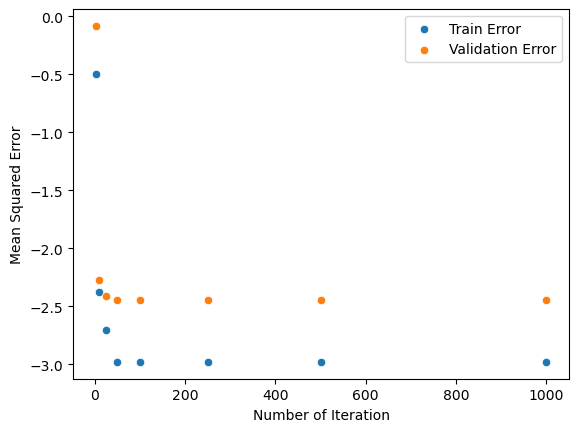

In [41]:
sns.scatterplot(x=stop_df['iterations'], y=np.log(stop_df['train error']), label='Train Error')
sns.scatterplot(x=stop_df['iterations'], y=np.log(stop_df['validation error']), label='Validation Error')

plt.xlabel('Number of Iteration')
plt.ylabel('Mean Squared Error')

In [43]:
bst = XGBRegressor( learning_rate=0.5, early_stopping_rounds=10)
bst = bst.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:1.60599
[1]	validation_0-rmse:0.95952
[2]	validation_0-rmse:0.61625
[3]	validation_0-rmse:0.44367
[4]	validation_0-rmse:0.36998
[5]	validation_0-rmse:0.34062
[6]	validation_0-rmse:0.32829
[7]	validation_0-rmse:0.32267
[8]	validation_0-rmse:0.32144
[9]	validation_0-rmse:0.32137
[10]	validation_0-rmse:0.32037
[11]	validation_0-rmse:0.31544
[12]	validation_0-rmse:0.31289
[13]	validation_0-rmse:0.31010
[14]	validation_0-rmse:0.30880
[15]	validation_0-rmse:0.30667
[16]	validation_0-rmse:0.30619
[17]	validation_0-rmse:0.30355
[18]	validation_0-rmse:0.30344
[19]	validation_0-rmse:0.30287
[20]	validation_0-rmse:0.30293
[21]	validation_0-rmse:0.30145
[22]	validation_0-rmse:0.30042
[23]	validation_0-rmse:0.30022
[24]	validation_0-rmse:0.30017
[25]	validation_0-rmse:0.30119
[26]	validation_0-rmse:0.30077
[27]	validation_0-rmse:0.29993
[28]	validation_0-rmse:0.29939
[29]	validation_0-rmse:0.29919
[30]	validation_0-rmse:0.29895
[31]	validation_0-rmse:0.29877
[32]	validation_0-

In [45]:
bst.best_iteration

48